# Reflecties

In [1]:
from cursusdef import *

## Inleiding

In dit hoofdstuk werken we een aantal voorbeelden uit die aangeven wat de invloed is van niet-aangepaste transmissielijnen op de signaalintegriteit.
Om hierin inzicht te krijgen is de meest eenvoudige aanpak te kijken wat er gebeurt wanneer een ideale digitale puls wordt aangelegd aan de transmissielijn.
In werkelijkheid moeten we natuurlijk beseffen dat de echte pulsvorm steeds eindige stijg- en daaltijd heeft ([slew-rate](https://en.wikipedia.org/wiki/Slew_rate)) en dat bovendien de stroom die geleverd wordt door de output transistors ook niet constant is. Meer specifiek zal deze stroom afnemen wanneer de spanning over de transistor te klein wordt.


Een voorbeeld waarin een meer realistische pulsvorm in detail wordt uitgerekent tonen we hieronder. De video in {Numref}`reflectievideo` toont bovenaan een PCB met baantjes met een karakteristieke impedantie 50 Ohm. Onderaan vergelijken we de situatie waarbij er al dan niet een stukje met karakteristieke impedantie 32 Ohm in de transmissielijn wordt toegevoegd. In beide gevallen vertrekt aan de ingang een puls van 1 V. 
In het geval zonder een baantje met karakteristieke impedantie 32 Ohm meten we aan de uitgang na 80 ps een puls van 953 mV, dus terug bijna 1 V. De maximale reflectie, zoals we die kunnen meten aan de ingang, blijft kleiner dan 9 mV, verwaarloosbaar klein dus. 
In het geval met een baantje met karakteristieke impedantie 32 Ohm meten we aan de uitgang na 80 ps een puls van 813 mV. De maximale reflectie, zoals we die kunnen meten aan de ingang, is 314 mV.

In [34]:
display.Video("./video/signalintegrity.mp4")

De simulatie in {Numref}`reflectievideo` is numeriek uitgevoerd aan de hand van het simulatiepaket [Ansys](https://www.ansys.com/).

Voor het berekenen van reflecties kunnen twee gevallen onderscheiden, namelijk het geval dat karakteristieke impedantie $Z_1$  gevolgd is door een transmissielijn met karakteristieke impedantie $Z_2$ (zie {numref}`tweetransmissie`) en het geval dat een transmissielijn met karakteristieke impedantie $Z_1$  afgesloten is door een terminatieimpedantie $Z_L$  (zie  {numref}`terminatie`). We gaan beide gevallen op dezelfde manier gaan uitwerken aan de hand van een ladderdiagramma.

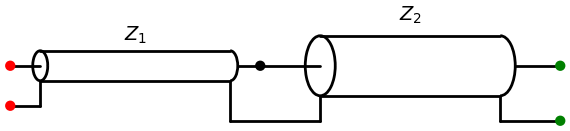

In [2]:
with schemdraw.Drawing():
    Dot(color='r')
    coax1 = Coax(d='right',length=5, label=r'$Z_1$')
    Dot()
    coax2 = Coax(d='right',length=3, scale=2,label=r'$Z_2$')
    Dot(color='g')
    Line(xy=coax2.shieldend,l=0.5,d='down')
    Line(tox=coax2.end,d='right')
    Dot(color='g')
    Line(xy=coax1.shieldstart,l=0.5,d='down')
    Line(tox=coax1.start,d='left')
    Dot(color='r')
    Line(xy=coax2.shieldstart,l=0.5,d='down')
    Line(tox=coax1.shieldend,d='left')
    Line(toy=coax1.shieldend,d='up')

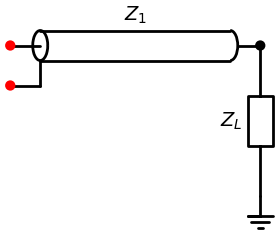

In [15]:
with schemdraw.Drawing():
    Dot(color='r')
    coax1 = Coax(d='right',length=5, label=r'$Z_1$')
    Dot()
    ResistorIEC(d='down',label=r'$Z_L$')
    Ground()
    Line(xy=coax1.shieldstart,l=0.5,d='down')
    Line(tox=coax1.start,d='left')
    Dot(color='r')

##  Uitwerken van een ladderdiagram

Bij het uitwerken van een ladderdiagram volgen we hoe een ideale stap in aan de ingang loopt over de transmissielijn. Bij elke overgang waar de karakteristieke impedantie verandert, berekenen we de reflectie en de transmissie van het signaal. De reflectie $\rho$ bij de overgang van de karakteristieke impedantie $Z_1$ naar de karakteristieke impedantie $Z_2$ bedraagt:

De amplitude van de reflectie wordt bepaald door:




Dit geldt zowel aan de ontvangerszijde als aan de stuurzijde

$$ \frac{V_{reflected}}{V_{incident}}=\rho = \frac{Z_2-Z_1}{Z_2+Z_1}$$

en de transmissie bedraagt $1+\rho$

Voor de gereflecteerde golf hebben we dan de vergelijkingen:

$$ \frac{V_{1\leftarrow}}{V_{1\rightarrow}}=\rho = \frac{Z_2-Z_1}{Z_2+Z_1}$$

$$ I_{1\rightarrow}=\frac{V_{1\rightarrow}}{Z_1}$$

$$ I_{1\leftarrow}=\frac{V_{1\leftarrow}}{Z_1}$$

Voor de doorgaande golf hebben we dan de vergelijkingen:

$$ \frac{V_{2\rightarrow}}{V_{1\rightarrow}}=1+ \rho $$

$$ I_{2\rightarrow}=\frac{V_{2\rightarrow}}{Z_2}$$

Deze vergelijkingen voor de reflectie en de transmissie gelden zowel voor het geval dat de puls van transmissielijn 1 (met karakteristieke impedantie $Z_1$) overgaat naar een puls op transmissielijn 2 (met karakteristieke impedantie $Z_2$), zie {numref}`tweetransmissie`, als voor het geval dat de puls van de transmissielijn afgesloten wordt door een belastingsimpedantie, zie {numref}`terminatie`. 

## Uitgewerkte voorbeelden

We werken dit uit aan de hand van een aantal voorbeelden.
Als eerste voorbeeld herbekijken we in tabelvorm het voorbeeld uit de video in {Numref}`reflectievideo`. Er is geen reflectie aan de bron of aan het einde maar aan de overgang tussen de transmissielijk van 50 Ohm en de transmissielijn van 32 Ohm hebben we telkens een reflectie.

$$ \rho_{1\circlearrowleft}=\rho_{2\circlearrowright}=\frac{32-50}{32+50}=\frac{-18}{82}= -0.22 $$

$$ \rho_{2\circlearrowleft}=\rho_{1\circlearrowright}=\frac{50-32}{50+32}=\frac{18}{82}= 0.22 $$

$$ \tau_{1\rightarrow}=\tau_{2\leftarrow}=1+\rho_{1\circlearrowleft}= 0.78 $$

$$ \tau_{2\rightarrow}=\tau_{1\leftarrow}=1+\rho_{2\circlearrowleft}= 1.22 $$

In [ ]:
18/82

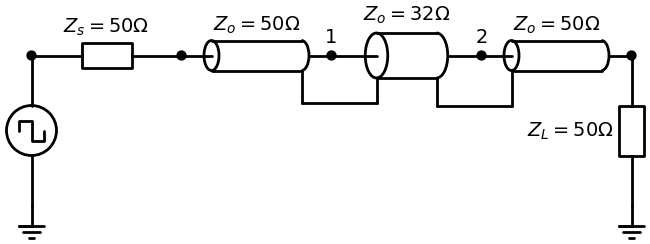

In [9]:
with schemdraw.Drawing():
    Ground()
    SourceSquare(d='up')
    Dot()
    ResistorIEC(d='right',label=r'$Z_s= 50 \Omega$')
    Dot()
    coax1 = Coax(d='right',length=3, label=r'$Z_o=50 \Omega$')
    Dot(label = '1')
    coax2 = Coax(d='right',length=2,scale=1.5, label=r'$Z_o=32 \Omega$')
    Dot(label = '2')
    coax3 = Coax(d='right',length=3, label=r'$Z_o=50 \Omega$')
    Dot()
    ResistorIEC(d='down',label=r'$Z_L= 50 \Omega$')
    Ground()
    Line(xy=coax2.shieldstart,l=0.5,d='down')
    Line(tox=coax1.shieldend,d='left')
    Line(toy=coax1.shieldend,d='up')
    Line(xy=coax3.shieldstart,l=0.7,d='down')
    Line(tox=coax2.shieldend,d='left')
    Line(toy=coax2.shieldend,d='up')

:::{list-table} Stap van 0V naar 1V
:header-rows: 1
:name: staptabel

* - Tijdstip
  - Spanning bron
  - Puls in het eerste segment
  - Spanning $V_{1}$
  - Puls in het tweede segment
  - Spanning $V_{1}$
  - Puls in het derde segment
  - Spanning einde
* - $T_{0}$
  - 1
  - 1  $\rightarrow$
  - 0
  -  
  - 0
  - 
  - 0
* - $T_{1}$
  - 1
  - -0.22 $\leftarrow$
  - 0.78
  - 0.78 $\rightarrow$
  - 0
  - 
  - 0
* - $T_{2}$
  - 0.78
  -   
  - 0.78
  - 0.172 $\leftarrow$
  - 0.952
  - 0.952 $\rightarrow$
  - 0
* - $T_{3}$
  - 0.78
  - 0.210 $\leftarrow$
  - 0.99
  - 0.0378 $\rightarrow$
  - 0.952
  - 
  - 0.952
* - $T_{4}$
  - 0.99
  - 
  - 0.99
  - 0.0083 $\leftarrow$
  - 0.9977
  - 0.0461 $\rightarrow$
  - 0.952
* - $T_{5}$
  - 0.99
  - 0.01 $\leftarrow$
  - 1.00
  - 0.0018 $\rightarrow$
  - 0.9977
  - 
  - 0.9977
* - $T_{6}$
  - 1.00
  - 
  - 1.00
  - 0.0004 $\leftarrow$
  - 0.9998
  - 0.0022 $\rightarrow$
  - 0.9977
:::

In [ ]:
0.78*0.22,0.78*1.22,0.78*0.22*0.22,0.78*0.22*1.22,0.78*0.22*0.22*0.22,0.78*0.22*0.22*1.22,0.78*0.22*0.22*0.22*0.22,0.78*0.22*0.22*0.22*1.22,0.78*0.22*0.22*0.22*0.22*0.22,0.78*0.22*0.22*0.22*0.22*1.22

In [ ]:
0.9516+0.04605744+0.0022291800960000004

Het tweede voorbeeld {numref}`ladder1schem` bestudeert een transmissielijn van 50$\Omega$ die afgesloten is met een terminatieweerstand van 120$\Omega$ en die een bronweerstand heeft in de driver chip van 30$\Omega$.

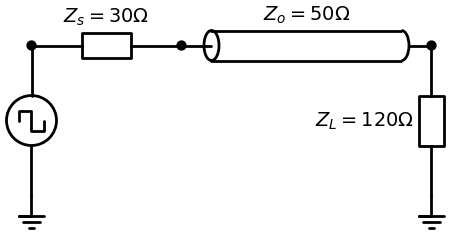

In [27]:
with schemdraw.Drawing():
    Ground()
    SourceSquare(d='up')
    Dot()
    ResistorIEC(d='right',label=r'$Z_s= 30 \Omega$')
    Dot()
    coax1 = Coax(d='right',length=5, label=r'$Z_o=50 \Omega$')
    Dot()
    ResistorIEC(d='down',label=r'$Z_L= 120 \Omega$')
    Ground()

Het eerste dat we hierbij uitrekenen zijn de reflectiecoëfficiënten. We rekenen ook uit wat de initiële puls is die op de lijn vertrekt ($V_{puls start}$) en we kunnen uitrekenen wat de spanning op de lijn zal zijn na een oneindig aantal iteraties ($V_{eind}$). 

* Reflectiecoëfficiënt eind:

* Reflectiecoëfficiënt begin:

* Initiële puls:



* Finale waarde spanning lijn:

In [ ]:
70/170,-20/80,50/80,120/150

$$ \rho_{eind} = \frac{Z_L-Z_o}{Z_L+Z_o}= \frac{120-50}{120+50}=0.41$$

$$ \rho_{begin} = \frac{Z_s-Z_o}{Z_s+Z_o}= \frac{30-50}{30+50}=-0.25$$

$$ V_{puls start} = \frac{Z_o}{Z_s+Z_o} V_{bron}= \frac{50}{30+50} V_{bron}=0.625 V_{bron}$$

$$ V_{eind} = \frac{Z_L}{Z_s+Z_L} V_{bron}= \frac{120}{30+120}V_{bron}=0.8 V_{bron}$$

Nu berekenen we het verloop van de puls over de lijn. Na elke reflectie wordt de puls kleiner ($|\rho| < 1$) en we tellen voor elk punt op de lijn de waarde van de spanning van de puls op telkens de puls is gepasseerd. Merk op dat aan het startpunt en aan het eindpunt er geen tijdsverschil is tussen de invallende en de gereflecteerde golf zodat we op deze punten beiden gelijktijdig moeten optellen.
Het resultaat van deze simulatie zien we in {numref}`ladder1`

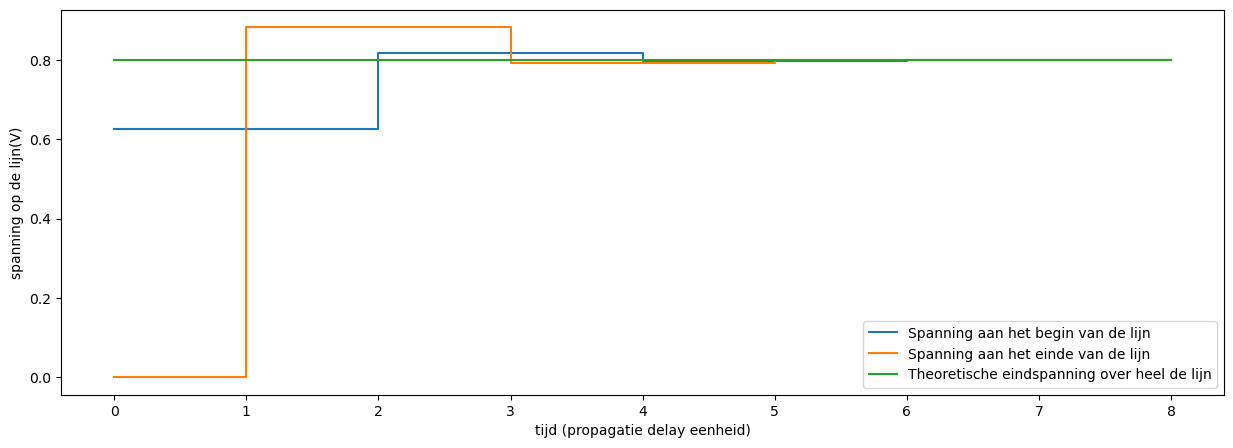

In [2]:
def ladderdiagram (Zo, Zstart,Zend,Tdelay=1,Vpulse=1,numstep=4):
    po_s=(Zstart-Zo)/(Zstart+Zo)
    po_e=(Zend-Zo)/(Zend+Zo)
    V_inf=Vpulse*Zend/(Zend+Zstart)
    tijd=[i*Tdelay  for i in range(2*numstep+1)  for j in range(2)]
    runningpulse=Vpulse*Zo/(Zo+Zstart)
    vstart=[runningpulse,runningpulse]
    veind=[0,0]
    for i in range(numstep):
        veind+=[veind[-1],veind[-1]+runningpulse*(1+po_e)]
        vstart+=[vstart[-1],vstart[-1]]
        runningpulse*=po_e
        veind+=[veind[-1],veind[-1]]
        vstart+=[vstart[-1],vstart[-1]+runningpulse*(1+po_s)]
        runningpulse*=po_s
    fig,ax=plt.subplots(figsize=(15,5))
    ax.plot(tijd,vstart,label="Spanning aan het begin van de lijn")
    ax.plot(tijd,veind,label="Spanning aan het einde van de lijn")
    ax.plot([0,tijd[-1]],[V_inf,V_inf],label="Theoretische eindspanning over heel de lijn")
    ax.set_ylabel('spanning op de lijn(V)');
    if Tdelay==1:
        ax.set_xlabel('tijd (propagatie delay eenheid)')
    else:
        ax.set_xlabel("tijd (ns)") 
    plt.legend()
    
ladderdiagram (50, 30,120)

We simuleren dit schema ook aan de hand van spice (zie {numref}`transmissie1`) en dit aan de hand van 3 gevallen: 

* De stijgtijd van de bron ($\tau_r$ = 0.1 ns) is veel korter dan de propagatietijd van de transmissielijn ($\tau_d$ = 1 ns). Het resultaat zien we in {numref}`t120tr01s`.
* De stijgtijd van de bron ($\tau_r$ = 1 ns) is gelijk aan de propagatietijd van de transmissielijn ($\tau_d$ = 1 ns). Het resultaat zien we in {numref}`t120tr1s`.
* De stijgtijd van de bron ($\tau_r$ = 6 ns) is veel langer dan de propagatietijd van de transmissielijn ($\tau_d$ = 1 ns). Het resultaat zien we in {numref}`t120tr6s`.


```{literalinclude} ./simul/transmissie1.sp
:language: spice
:name: transmissie1
:caption: Transmissielijn met 30 Ohm aan de bron en 120 Ohm als belasting
```

In [17]:
spicelisting("simul/transmissie1.sp")

.TITLE Transmission Line Example
Rs 1 2 30
O1 2 0 3 0 LOSSYMOD TD=2n
RL 3 0 120
.model LOSSYMOD ltra r=5.14 g=0 l=615E-9 c=246e-12 len=0.0812

* R =  514 Ohm/cm
* L =  615 nH/cm
* C =  246 pF/cm
* g =  0

$$ Z_o=\sqrt{\frac{j \omega L+R}{j \omega C+g}}$$

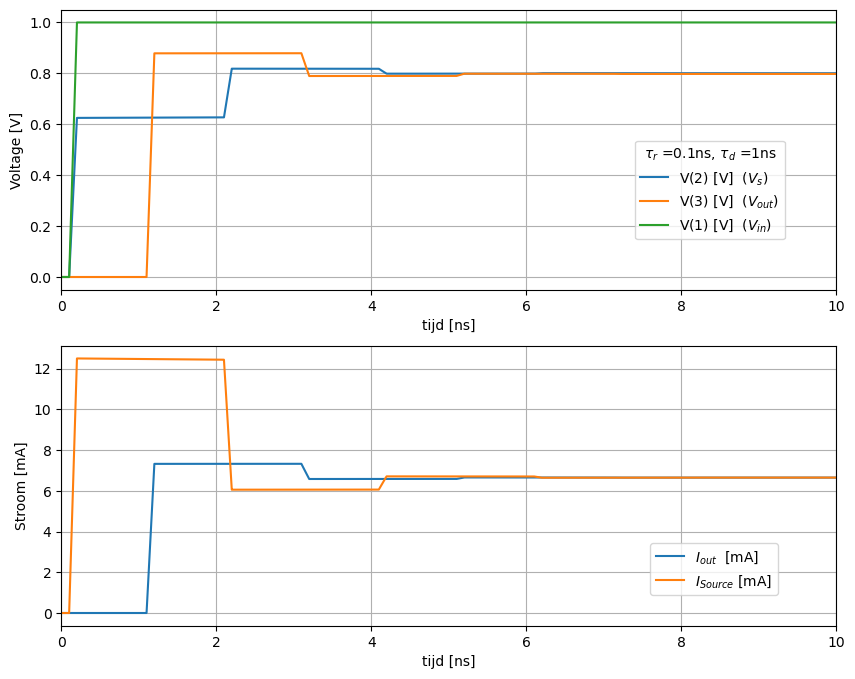

In [64]:
circuit=SpiceParser(path='simul/transmissie1.sp').build_circuit() 
end_time=10e-9
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 0), (1e-10, 0), (2e-10, 1)])
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =0.1ns, $\tau_d$ =1ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/120,label=r'$I_{out}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['v1']*1e3,label=r'$I_{Source}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

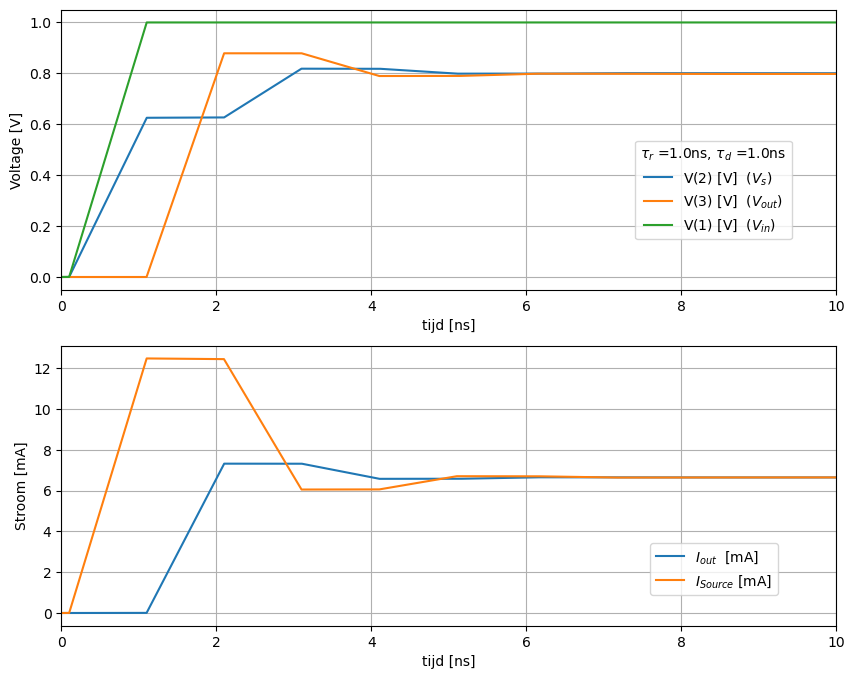

In [63]:
circuit=SpiceParser(path='simul/transmissie1.sp').build_circuit() 
end_time=10e-9
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 0), (1e-10, 0), (11e-10, 1)])
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =1.0ns, $\tau_d$ =1.0ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/120,label=r'$I_{out}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['v1']*1e3,label=r'$I_{Source}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

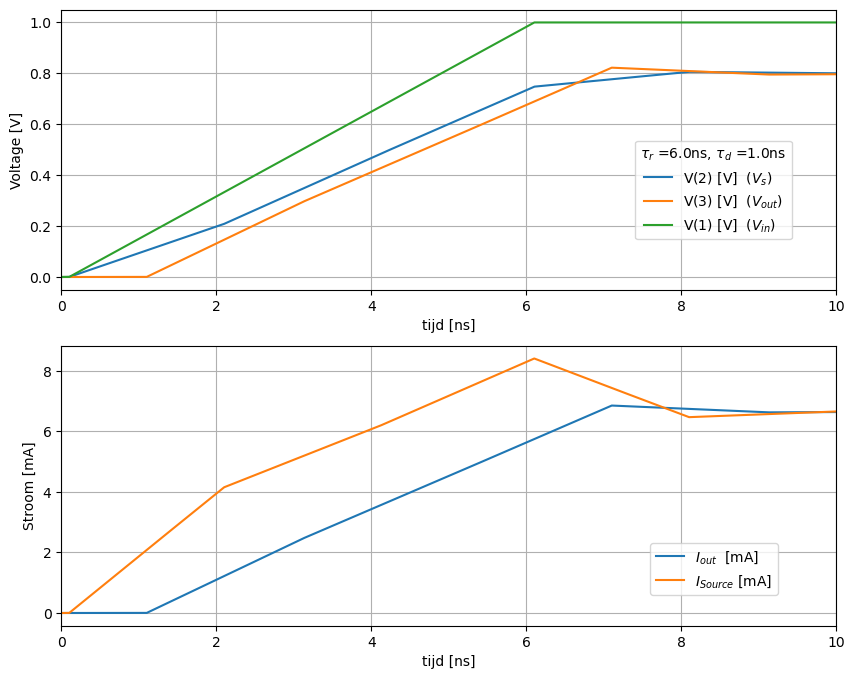

In [62]:
circuit=SpiceParser(path='simul/transmissie1.sp').build_circuit() 
end_time=10e-9
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 0), (1e-10, 0), (61e-10, 1)])
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =6.0ns, $\tau_d$ =1.0ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/120,label=r'$I_{out}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['v1']*1e3,label=r'$I_{Source}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

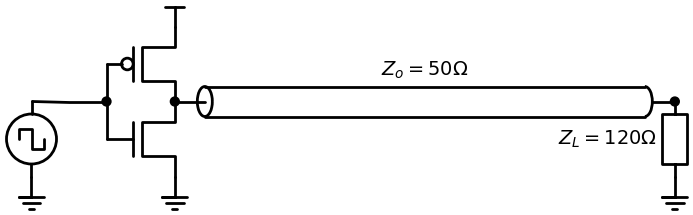

In [42]:
with schemdraw.Drawing():
    Ground()
    nmos=NFet(d='left')
    pmos=PFet()
    Vdd()
    Line(xy=pmos.gate,l=0.75,d='down')
    doti=Dot()
    Line(toy=nmos.gate)
    Line(xy=doti.start,l=1.5,d='left')
    SourceSquare(d='down', toy=nmos.drain)
    Ground()
    Dot(xy=nmos.source)
    coax1 = Coax(d='right',length=10, label=r'$Z_o=50 \Omega$')
    Dot()
    ResistorIEC(d='down',label=r'$Z_L= 120 \Omega$', toy=nmos.drain)
    Ground()

We simuleren dit schema ook aan de hand van spice (zie {numref}`transmissie1d`) en dit aan de hand van 3 gevallen: 

* De stijgtijd van de bron ($\tau_r$ = 0.1 ns) is veel korter dan de propagatietijd van de transmissielijn ($\tau_d$ = 1 ns). Het resultaat zien we in {numref}`t120tr01`.
* De stijgtijd van de bron ($\tau_r$ = 1 ns) is gelijk aan de propagatietijd van de transmissielijn ($\tau_d$ = 1 ns). Het resultaat zien we in {numref}`t120tr1`.
* De stijgtijd van de bron ($\tau_r$ = 6 ns) is veel langer dan de propagatietijd van de transmissielijn ($\tau_d$ = 1 ns). Het resultaat zien we in {numref}`t120tr6`.




```{literalinclude} ./simul/transmissie1d.sp
:language: spice
:name: transmissie1d
:caption: Transmissielijn met 120 Ohm als belasting en CMOS driver
```

In [76]:
spicelisting("simul/transmissie1d.sp")

.TITLE Transmission Line with driver
MN1 0 1 2 0  NMOS w=150u L=0.50u
MP1 4 1 2 4  PMOS w=350u L=0.50U
VDD 4 0 1
O1 2 0 3 0 LOSSYMOD TD=2n
RL 3 0 120
.model LOSSYMOD ltra r=5.14 g=0 l=615E-9 c=246e-12 len=0.0812
.MODEL NMOS NMOS(LEVEL=1 VTO=0.05 KP=90.000E-6 LAMBDA=0.001)
.MODEL PMOS PMOS(LEVEL=1 VTO=-0.05 KP=55.000E-6 LAMBDA=0.001)

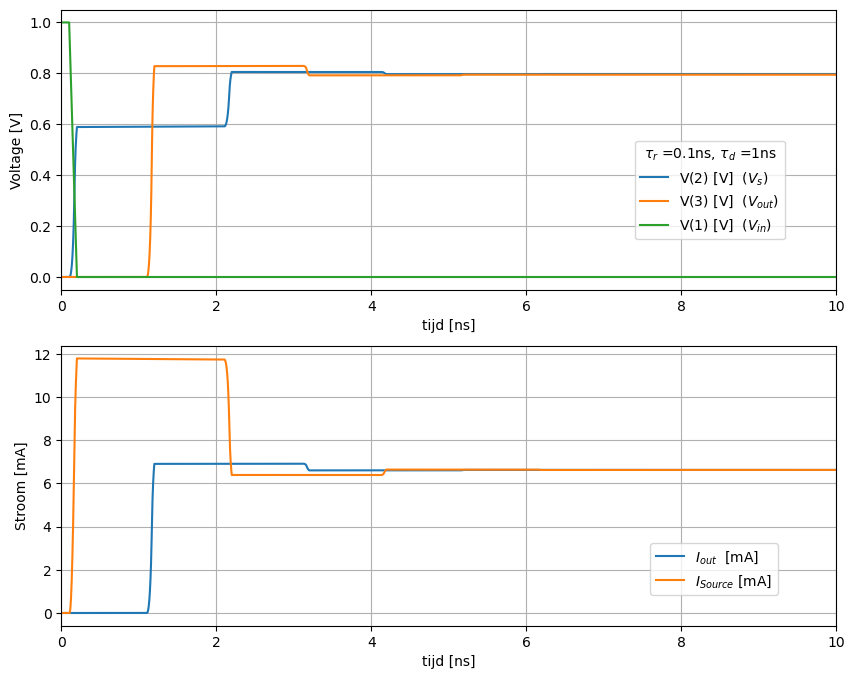

In [73]:
circuit=SpiceParser(path='simul/transmissie1d.sp').build_circuit() 
end_time=10e-9
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 1), (1e-10, 1), (2e-10, 0)])
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =0.1ns, $\tau_d$ =1ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/120,label=r'$I_{out}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['vdd']*1e3,label=r'$I_{Source}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

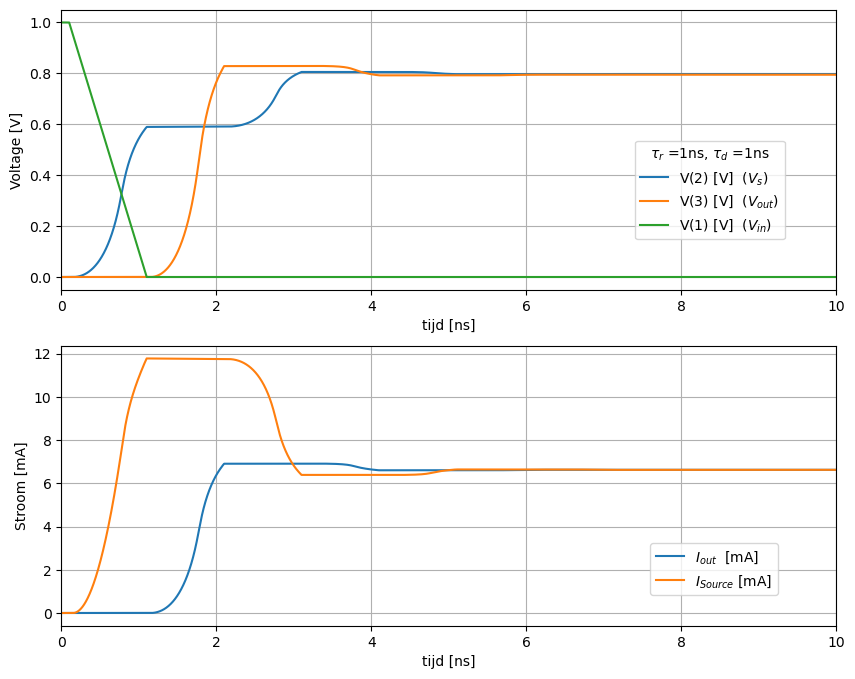

In [72]:
circuit=SpiceParser(path='simul/transmissie1d.sp').build_circuit() 
end_time=10e-9
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 1), (1e-10, 1), (11e-10, 0)])
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =1ns, $\tau_d$ =1ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/120,label=r'$I_{out}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['vdd']*1e3,label=r'$I_{Source}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

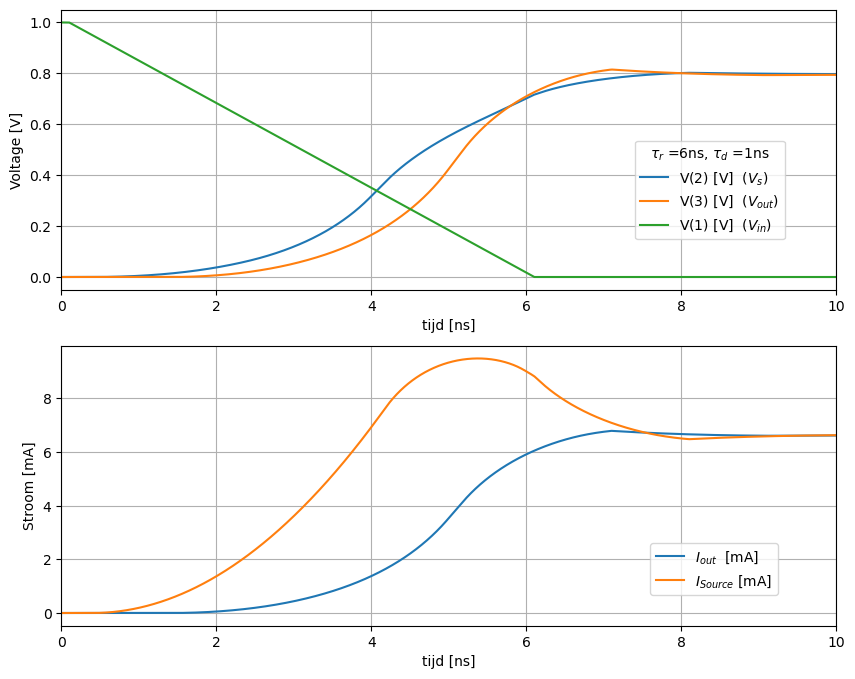

In [71]:
circuit=SpiceParser(path='simul/transmissie1d.sp').build_circuit() 
end_time=10e-9
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 1), (1e-10, 1), (61e-10, 0)])
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =6ns, $\tau_d$ =1ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/120,label=r'$I_{out}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['vdd']*1e3,label=r'$I_{Source}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

We kunnen het theoretisch ladderdiagramma ook uitwerken voor een praktische propagatievertraging van 1.5ns en een pulse gestuurd door een IC van met een voedingsspanning op de uitgangsbuffers van 3.3 V. De aan-weerstand van de uitgangsbuffers is 10 Ohm (de aanweerstand van de pMOS) en de terminatieweerstand van de lijn is 25 Ohm (zie {numref}`ladder2schem`). In dat geval verloopt de stijgende puls theoretisch zoals in {numref}`ladderPmos`

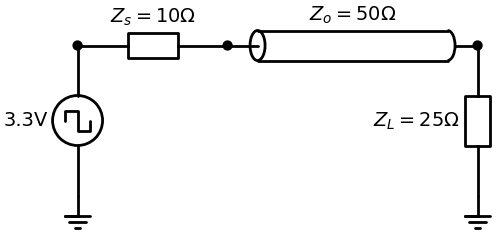

In [32]:
with schemdraw.Drawing():
    Ground()
    SourceSquare(d='up', label='3.3V')
    Dot()
    ResistorIEC(d='right',label=r'$Z_s= 10 \Omega$')
    Dot()
    coax1 = Coax(d='right',length=5, label=r'$Z_o=50 \Omega$')
    Dot()
    ResistorIEC(d='down',label=r'$Z_L= 25 \Omega$')
    Ground()

Ook hier rekenen we de reflectiecoëfficiënten uit.

* Reflectiecoëfficiënt eind:

* Reflectiecoëfficiënt begin:

* Initiële puls:
  

 
* Finale waarde spanning lijn:

In [ ]:
-25/75,-40/60, 50/60*3.3,25/35*3.3

$$ \rho_{eind} = \frac{Z_L-Z_o}{Z_L+Z_o}= \frac{25-50}{25+50}=-0.33$$

$$ \rho_{begin} = \frac{Z_s-Z_o}{Z_s+Z_o}= \frac{10-50}{10+50}=-0.66$$

$$ V_{puls start} = \frac{Z_o}{Z_s+Z_o} V_{bron}= \frac{50}{10+50} 3.3V=2.75 V$$

$$ V_{eind} = \frac{Z_L}{Z_s+Z_L} V_{bron}= \frac{25}{10+25}3.3 V=2.36 V$$

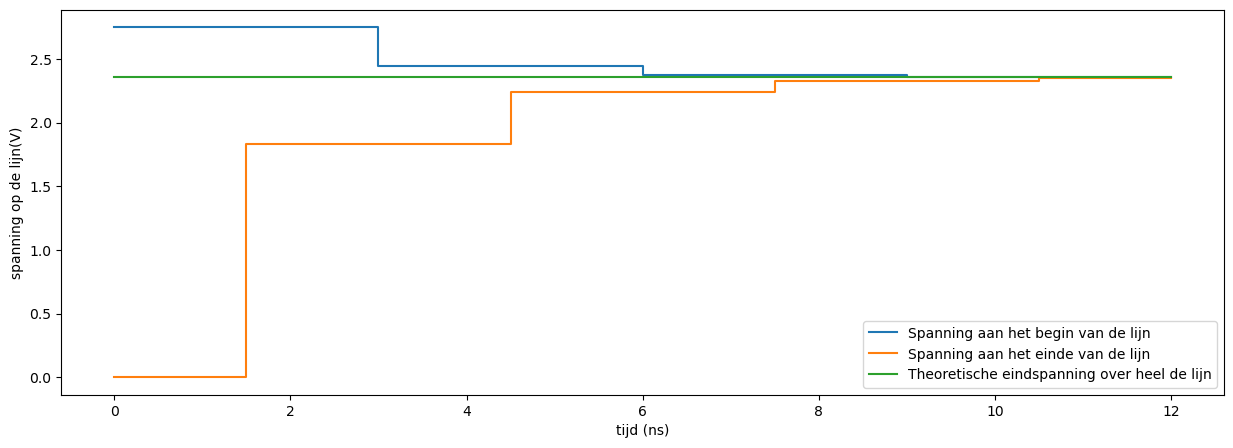

In [3]:
ladderdiagram (50, 10,25,Tdelay=1.5,Vpulse=3.3)

In [ ]:
np.sqrt(615E-9/246e-12),1.5e-9/np.sqrt(615E-9*246e-12)

We simuleren dit schema ook aan de hand van spice (zie {numref}`transmissie2`) en dit aan de hand van 3 gevallen: 

* De stijgtijd van de bron ($\tau_r$ = 0.1 ns) is veel korter dan de propagatietijd van de transmissielijn ($\tau_d$ = 1.5 ns). Het resultaat zien we in {numref}`t25tr01s`.
* De stijgtijd van de bron ($\tau_r$ = 1 ns) is gelijk aan de propagatietijd van de transmissielijn ($\tau_d$ = 1.5 ns). Het resultaat zien we in {numref}`t25tr15s`.
* De stijgtijd van de bron ($\tau_r$ = 9 ns) is veel langer dan de propagatietijd van de transmissielijn ($\tau_d$ = 1.5 ns). Het resultaat zien we in {numref}`t25tr9s`.



```{literalinclude} ./simul/transmissie2.sp
:language: spice
:name: transmissie2
:caption: Transmissielijn met 10 Ohm aan de bron en 25 Ohm als belasting
```

In [75]:
spicelisting("simul/transmissie2.sp")

.TITLE Transmission Line Example
Rs 1 2 10
O1 2 0 3 0 LOSSYMOD TD=2n
RL 3 0 25
.model LOSSYMOD ltra r=5.14 g=0 l=615E-9 c=246e-12 len=0.1219

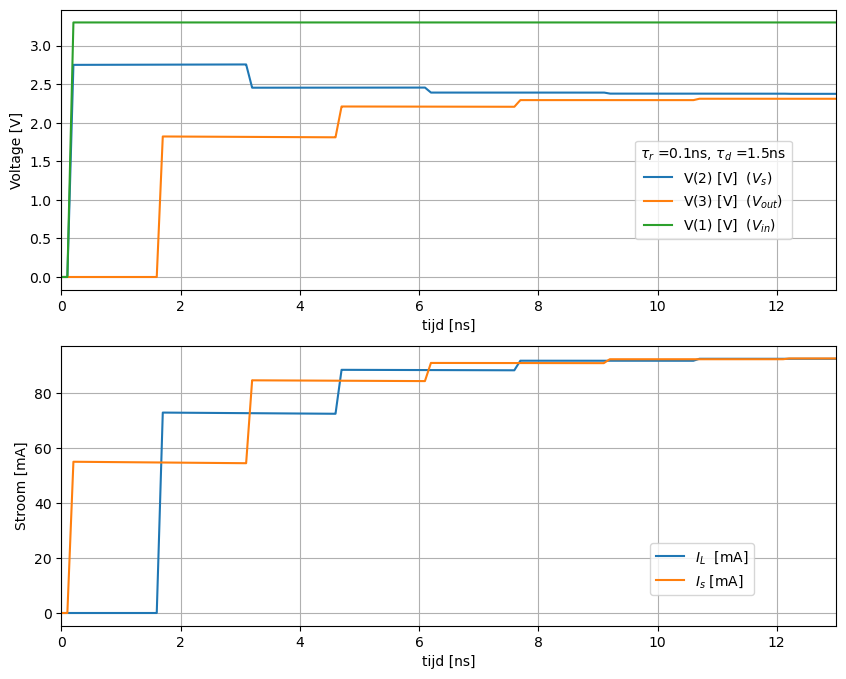

In [20]:
circuit=SpiceParser(path='simul/transmissie2.sp').build_circuit() 
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 0), (1e-10, 0), (2e-10, 3.3)])
end_time=13e-9
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =0.1ns, $\tau_d$ =1.5ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/25,label=r'$I_{L}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['v1']*1e3,label=r'$I_{s}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

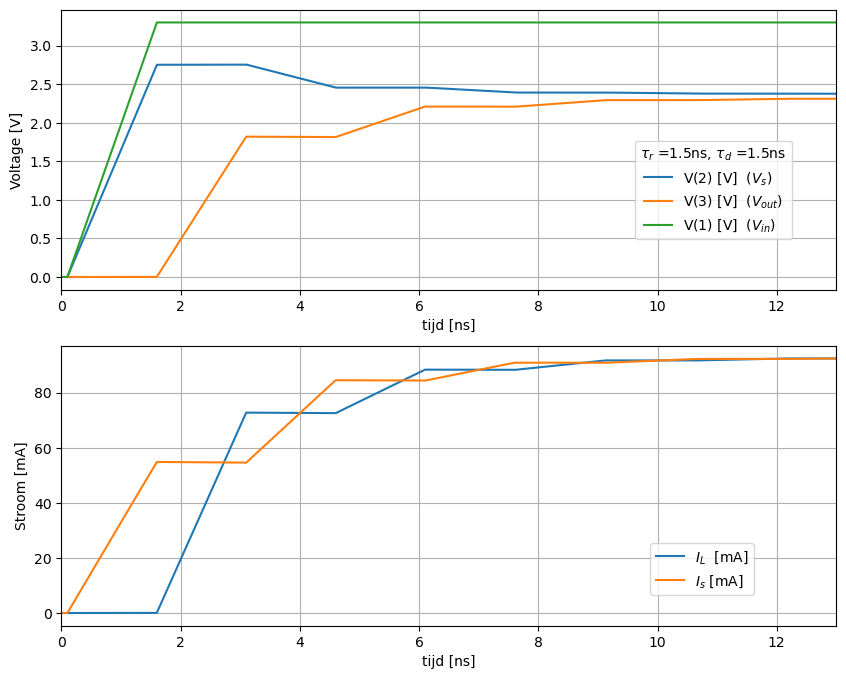

In [70]:
circuit=SpiceParser(path='simul/transmissie2.sp').build_circuit() 
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 0), (1e-10, 0), (16e-10, 3.3)])
end_time=13e-9
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =1.5ns, $\tau_d$ =1.5ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/25,label=r'$I_{L}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['v1']*1e3,label=r'$I_{s}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

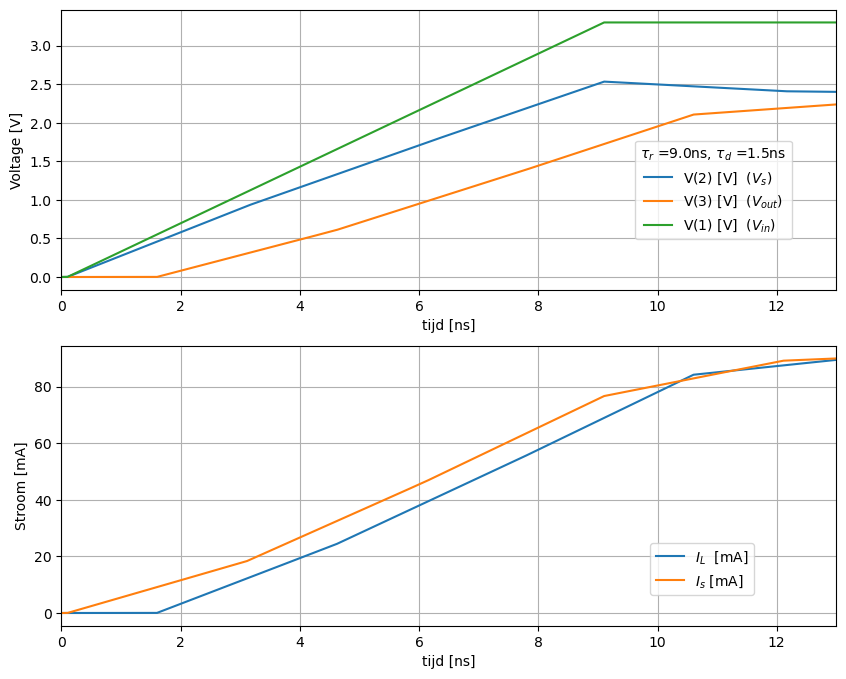

In [54]:
circuit=SpiceParser(path='simul/transmissie2.sp').build_circuit() 
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 0), (1e-10, 0), (91e-10, 3.3)])
end_time=13e-9
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =9.0ns, $\tau_d$ =1.5ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/25,label=r'$I_{L}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['v1']*1e3,label=r'$I_{s}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

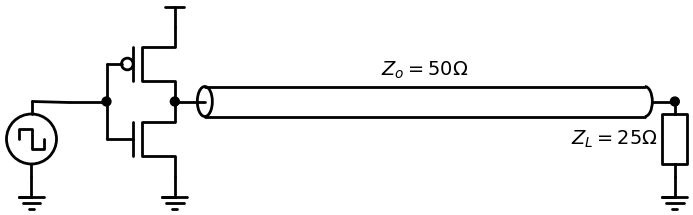

In [41]:
with schemdraw.Drawing():
    Ground()
    nmos=NFet(d='left')
    pmos=PFet()
    Vdd()
    Line(xy=pmos.gate,l=0.75,d='down')
    doti=Dot()
    Line(toy=nmos.gate)
    Line(xy=doti.start,l=1.5,d='left')
    SourceSquare(d='down', toy=nmos.drain)
    Ground()
    Dot(xy=nmos.source)
    coax1 = Coax(d='right',length=10, label=r'$Z_o=50 \Omega$')
    Dot()
    ResistorIEC(d='down',label=r'$Z_L= 25 \Omega$', toy=nmos.drain)
    Ground()

We simuleren dit schema ook aan de hand van spice (zie {numref}`transmissie2d`) en dit aan de hand van 3 gevallen: 

* De stijgtijd van de bron ($\tau_r$ = 0.1 ns) is veel korter dan de propagatietijd van de transmissielijn ($\tau_d$ = 1.5 ns). Het resultaat zien we in {numref}`t25tr01`.
* De stijgtijd van de bron ($\tau_r$ = 1 ns) is gelijk aan de propagatietijd van de transmissielijn ($\tau_d$ = 1.5 ns). Het resultaat zien we in {numref}`t25tr15`.
* De stijgtijd van de bron ($\tau_r$ = 9 ns) is veel langer dan de propagatietijd van de transmissielijn ($\tau_d$ = 1.5 ns). Het resultaat zien we in {numref}`t25tr9`.

```{literalinclude} ./simul/transmissie2d.sp
:language: spice
:name: transmissie2d
:caption: Transmissielijn met 25 Ohm als belasting en een CMOS driver
```

In [74]:
spicelisting("simul/transmissie2d.sp")

.TITLE Transmission Line with driver
MN1 0 1 2 0  NMOS w=150u L=0.50u
MP1 4 1 2 4  PMOS w=350u L=0.50U
VDD 4 0 3.3
O1 2 0 3 0 LOSSYMOD TD=2n
RL 3 0 25
.model LOSSYMOD ltra r=5.14 g=0 l=615E-9 c=246e-12 len=0.1219
.MODEL NMOS NMOS(LEVEL=1 VTO=0.50 KP=90.000E-6 LAMBDA=0.001)
.MODEL PMOS PMOS(LEVEL=1 VTO=-0.45 KP=55.000E-6 LAMBDA=0.001)

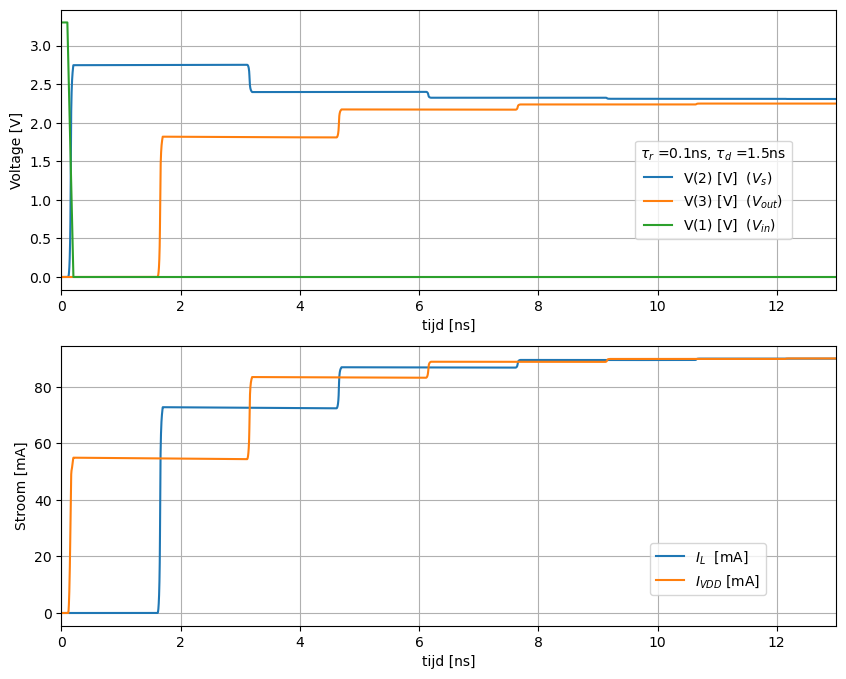

In [50]:
circuit=SpiceParser(path='simul/transmissie2d.sp').build_circuit() 
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 3.3), (1e-10, 3.3), (2e-10, 0)])
end_time=13e-9
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =0.1ns, $\tau_d$ =1.5ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/25,label=r'$I_{L}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['vdd']*1e3,label=r'$I_{VDD}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

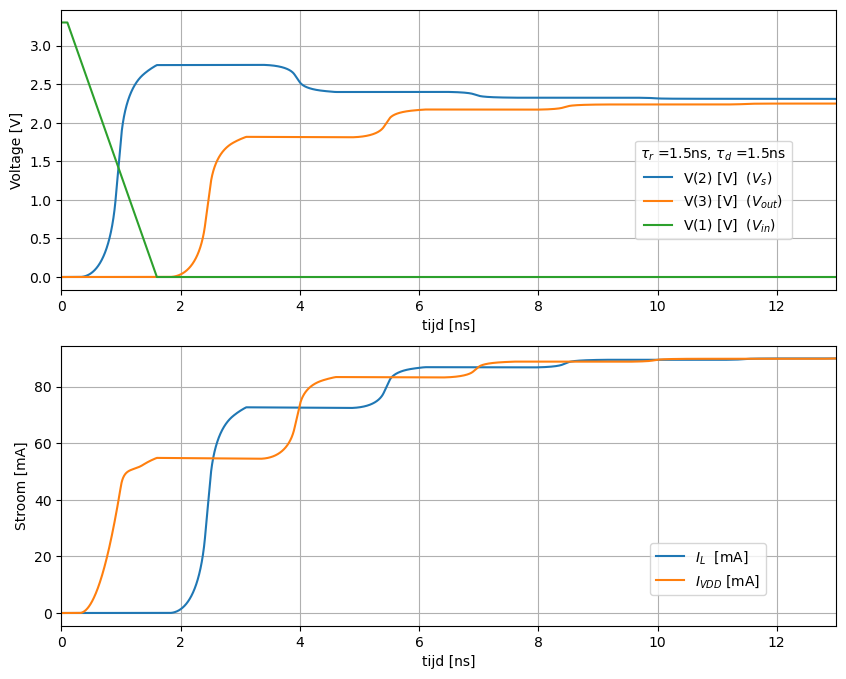

In [51]:
circuit=SpiceParser(path='simul/transmissie2d.sp').build_circuit() 
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 3.3), (1e-10, 3.3), (16e-10, 0)])
end_time=13e-9
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =1.5ns, $\tau_d$ =1.5ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/25,label=r'$I_{L}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['vdd']*1e3,label=r'$I_{VDD}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');

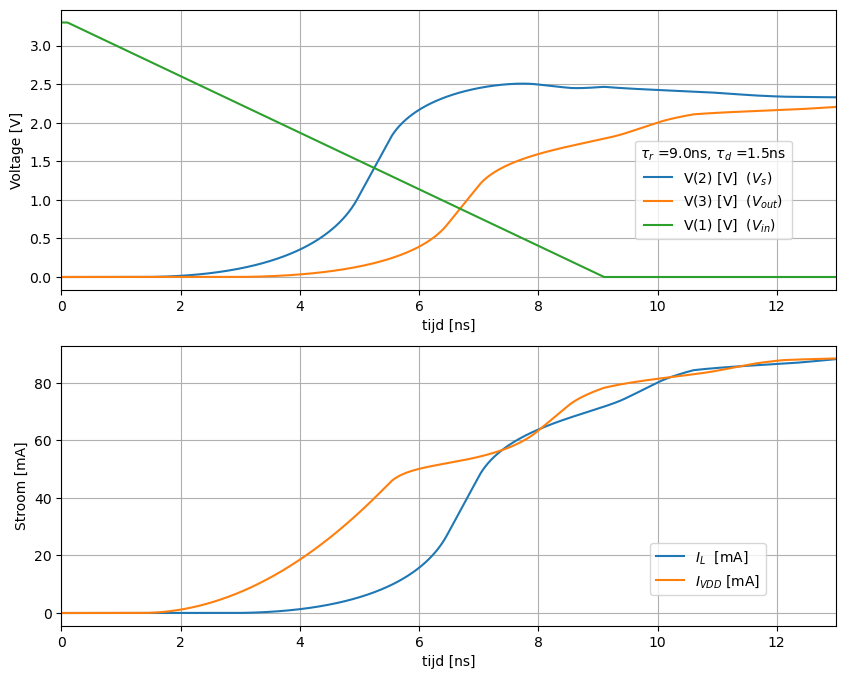

In [53]:
circuit=SpiceParser(path='simul/transmissie2d.sp').build_circuit() 
circuit.PieceWiseLinearVoltageSource('1','1','0', values=[(0, 3.3), (1e-10, 3.3), (91e-10, 0)])
end_time=13e-9
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=1e-12, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))

ax[0].plot(analysis.time*1e9,analysis.nodes['2'],label=r'V(2) [V]  ($V_s$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['3'],label=r'V(3) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e9,analysis.nodes['1'],label=r'V(1) [V]  ($V_{in}$)')
ax[0].legend(title=r'$\tau_r$ =9.0ns, $\tau_d$ =1.5ns', loc=(0.74,.18))
ax[0].grid()
ax[0].set_xlabel('tijd [ns]')
ax[0].set_xlim(0,end_time*1e9)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e9,analysis.nodes['3']*1e3/25,label=r'$I_{L}$  [mA]')
ax[1].plot(analysis.time*1e9,-analysis.branches['vdd']*1e3,label=r'$I_{VDD}$ [mA]')
ax[1].legend( loc=(0.76,.11))
ax[1].grid()
ax[1].set_xlabel('tijd [ns]')
ax[1].set_xlim(0,end_time*1e9)
ax[1].set_ylabel('Stroom [mA]');